# Airbnb Price Prediction Focus Area & Hypothesis

Data source: airbnb prices.csv (is made available in a online shared GDrive)

## Area of Focus

1. The main objective of this analysis is to create an Exploratory Data Analysis on NYC Airbnb data.
2. Initially, will begin with importing the overall py libs and dataset into Jupyter


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.utils import class_weight
import tensorflow as tf

In [2]:
data = pd.read_csv('AB_NYC_2019.csv')

In [3]:
data

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129
6,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,2017-10-05,0.40,1,0
7,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,2019-06-24,3.47,1,220
8,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,2017-07-21,0.99,1,0
9,5238,Cute & Cozy Lower East Side 1 bdrm,7549,Ben,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150,1,160,2019-06-09,1.33,4,188


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
id                                48895 non-null int64
name                              48879 non-null object
host_id                           48895 non-null int64
host_name                         48874 non-null object
neighbourhood_group               48895 non-null object
neighbourhood                     48895 non-null object
latitude                          48895 non-null float64
longitude                         48895 non-null float64
room_type                         48895 non-null object
price                             48895 non-null int64
minimum_nights                    48895 non-null int64
number_of_reviews                 48895 non-null int64
last_review                       38843 non-null object
reviews_per_month                 38843 non-null float64
calculated_host_listings_count    48895 non-null int64
availability_365                  48895 non-null int64

## What do we understand from the data?

1. Dataset is a consolidation between room listing or pricing along with its satisfaction survey.
2. Null values are identified as NaN (we might need to impute this?)
3. 48K records to be analysed, with potential nulls

4. Identifiable geolocation through lat and long
5. Data availability is only from 1 city. However, distinct neighborhoods are present

# Visualizations

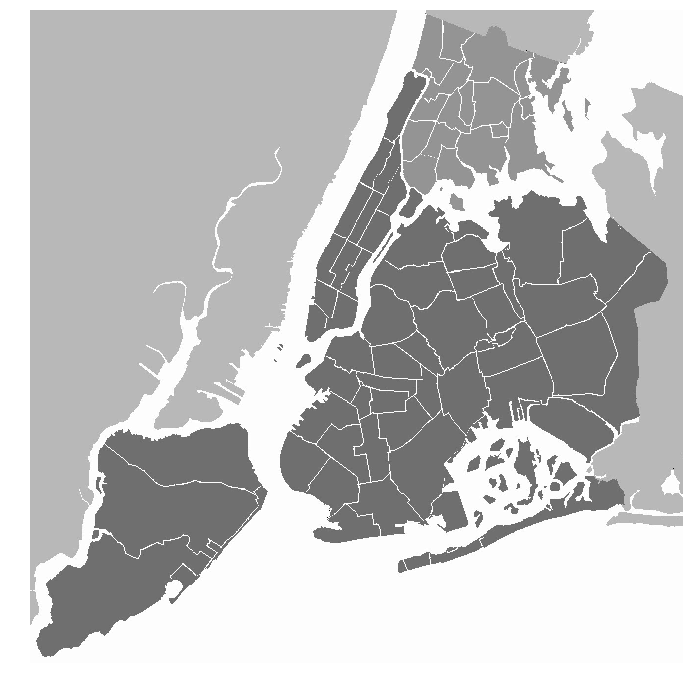

In [5]:
img = Image.open('New_York_City_.png')

plt.figure(figsize=(12,12))
plt.axis('off')
plt.imshow(img, extent= (0,1,0,1)) #min max of each axis
plt.show()

Can we use to plot the data onto the map above?

Yes, we can. We can use the lat and long

In [6]:
coords = data.loc[:,['longitude', 'latitude']].copy() #we make a copy of only lat and long

In [7]:
coords

,longitude,latitude
0,-73.97237,40.64749
1,-73.98377,40.75362
2,-73.94190,40.80902
3,-73.95976,40.68514
4,-73.94399,40.79851
5,-73.97500,40.74767
6,-73.95596,40.68688
7,-73.98493,40.76489
8,-73.96723,40.80178
9,-73.99037,40.71344


Let's apply a minmaxscaler to these column so can plot them in the map, that's why we were using extend

In [8]:
min_max_scaler = MinMaxScaler()

coords = pd.DataFrame(min_max_scaler.fit_transform(coords), columns=coords.columns) #this is going to scale our data to 0 and 1 range
coords

,longitude,latitude
0,0.511921,0.357393
1,0.490469,0.614199
2,0.569257,0.748252
3,0.535649,0.448496
4,0.565324,0.722820
5,0.506972,0.599802
6,0.542800,0.452706
7,0.488286,0.641469
8,0.521593,0.730733
9,0.478050,0.516974


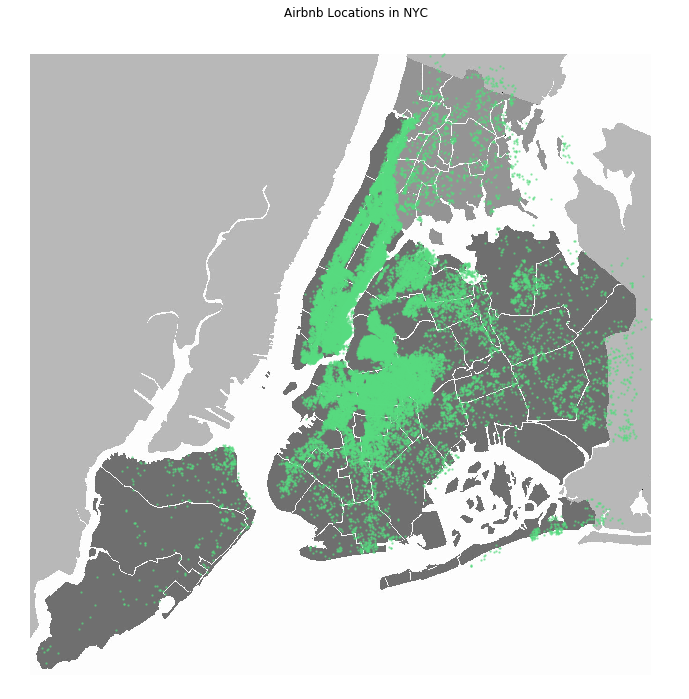

In [9]:
plt.figure(figsize=(12,12))
plt.axis('off')
plt.imshow(img, extent= (-0.02,1,-0.02,1)) #min max of each axis
plt.scatter(x = coords['longitude'], y= coords['latitude'], s=2, c= '#57db80', alpha=0.5) # we plot a scatter plot on top
plt.title('Airbnb Locations in NYC')
plt.show()

#s meaning size, so smaller scatter
#c meaning the color
#alpha is the opacity, we turn it down

Let's do cleaning

In [10]:
data

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129
6,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,2017-10-05,0.40,1,0
7,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,2019-06-24,3.47,1,220
8,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,2017-07-21,0.99,1,0
9,5238,Cute & Cozy Lower East Side 1 bdrm,7549,Ben,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150,1,160,2019-06-09,1.33,4,188


In [17]:
unneeded_columns = ['id', 'name','host_id','host_name']
data = data.drop(unneeded_columns, axis=1)

In [18]:
data

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
5,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129
6,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,2017-10-05,0.40,1,0
7,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,2019-06-24,3.47,1,220
8,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,2017-07-21,0.99,1,0
9,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150,1,160,2019-06-09,1.33,4,188


In [19]:
data

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
5,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129
6,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,2017-10-05,0.40,1,0
7,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,2019-06-24,3.47,1,220
8,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,2017-07-21,0.99,1,0
9,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150,1,160,2019-06-09,1.33,4,188


In [20]:
print('Total Missing Value', data.isna().sum().sum())

Total Missing Value 20104


In [21]:
data.isna().mean() #we can see like okay it has like 20% missing values

neighbourhood_group               0.000000
neighbourhood                     0.000000
latitude                          0.000000
longitude                         0.000000
room_type                         0.000000
price                             0.000000
minimum_nights                    0.000000
number_of_reviews                 0.000000
last_review                       0.205583
reviews_per_month                 0.205583
calculated_host_listings_count    0.000000
availability_365                  0.000000
dtype: float64

In [22]:
len(data['last_review'].unique()) #very less in the record, no mean can be used to impute NaN date, let's try to impute

1765

In [23]:
#No reviews, mostly will have NaN.
#Because missing values in last review is difficult to deal, and it has very less significant. we will drop it
#Reviews_per_month column, we will impute it to be 0 for NaN because, since, it meant no reviews for that location

data = data.drop('last_review', axis=1)

data['reviews_per_month'] = data['reviews_per_month'].fillna(0)

In [24]:
print('Total Missing Value', data.isna().sum().sum())

Total Missing Value 0


In [27]:
data

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0.00,1,365
3,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0
5,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,0.59,1,129
6,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,0.40,1,0
7,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,3.47,1,220
8,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,0.99,1,0
9,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150,1,160,1.33,4,188


## Creating Labels

We want to be able to predict it a location will be available 365 days of the year.

Let's change the availability_365 to be simple binary, 1 denotes yes, 0 means no

In [28]:
data

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0.00,1,365
3,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0
5,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,0.59,1,129
6,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,0.40,1,0
7,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,3.47,1,220
8,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,0.99,1,0
9,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150,1,160,1.33,4,188


In [29]:
data['availability_365'] = data['availability_365'].apply(lambda x:1 if x == 365 else 0)

#lambda is an anonymous function, meaning that it has no specific name
#It has a restricted access, however we can still apply several arguments to the function

In [31]:
#check class distribution

data['availability_365'].value_counts()/len(data['availability_365'])

# from here we can see that 90% of the data is not available for 365
# this shows that, it is a very skewed dataset 

0    0.973515
1    0.026485
Name: availability_365, dtype: float64

## Encoding features

so that everything is presented in numerical form

In [33]:
#let's get the unique values for each categorical feature, so we can decide on how to encode them

data

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,1
1,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,0
2,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0.00,1,1
3,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,0
4,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0
5,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,0.59,1,0
6,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,0.40,1,0
7,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,3.47,1,0
8,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,0.99,1,0
9,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150,1,160,1.33,4,0


In [34]:
# create a dictionary

{feature: list(data[feature].unique()) for feature in data.columns if data.dtypes[feature] == 'object'} #or string column

#these are essentially, nominal features. So let's do one hot encode

{'neighbourhood_group': ['Brooklyn',
  'Manhattan',
  'Queens',
  'Staten Island',
  'Bronx'],
 'neighbourhood': ['Kensington',
  'Midtown',
  'Harlem',
  'Clinton Hill',
  'East Harlem',
  'Murray Hill',
  'Bedford-Stuyvesant',
  "Hell's Kitchen",
  'Upper West Side',
  'Chinatown',
  'South Slope',
  'West Village',
  'Williamsburg',
  'Fort Greene',
  'Chelsea',
  'Crown Heights',
  'Park Slope',
  'Windsor Terrace',
  'Inwood',
  'East Village',
  'Greenpoint',
  'Bushwick',
  'Flatbush',
  'Lower East Side',
  'Prospect-Lefferts Gardens',
  'Long Island City',
  'Kips Bay',
  'SoHo',
  'Upper East Side',
  'Prospect Heights',
  'Washington Heights',
  'Woodside',
  'Brooklyn Heights',
  'Carroll Gardens',
  'Gowanus',
  'Flatlands',
  'Cobble Hill',
  'Flushing',
  'Boerum Hill',
  'Sunnyside',
  'DUMBO',
  'St. George',
  'Highbridge',
  'Financial District',
  'Ridgewood',
  'Morningside Heights',
  'Jamaica',
  'Middle Village',
  'NoHo',
  'Ditmars Steinway',
  'Flatiron Distr

### what is one hot encoding

One hot encoding is a process by which categorical variables are converted into a form that could be provided to ML algorithms to do a better job in prediction.

In [35]:
def onehot_encode(df, columns, prefixes):
    df = df.copy()
    for column, prefix in zip(columns, prefixes):
        dummies = pd.get_dummies(df[column], prefix = prefix)
        df = pd.concat([df, dummies], axis=1)
        df = df.drop(column, axis=1)
    return df

# zip will help to couple up the elements in column and prefixes
# get the dummies for the given column and including the prefixes
# concat the original df and the one hot or dummies columns
# and then drop the original columns, store that in the df

In [36]:
data = onehot_encode( data, columns=['neighbourhood_group','neighbourhood','room_type' ], prefixes=['G', 'N', 'R'])

## Let's do scaling or splitting

currently, the data is fully numeric, so we need to scale the data so that columns has mean 0 and unit variance.
First, we need to split the data into X (features) and Y(target)

In [37]:
data

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,G_Bronx,G_Brooklyn,...,N_Williamsburg,N_Willowbrook,N_Windsor Terrace,N_Woodhaven,N_Woodlawn,N_Woodrow,N_Woodside,R_Entire home/apt,R_Private room,R_Shared room
0,40.64749,-73.97237,149,1,9,0.21,6,1,0,1,...,0,0,0,0,0,0,0,0,1,0
1,40.75362,-73.98377,225,1,45,0.38,2,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,40.80902,-73.94190,150,3,0,0.00,1,1,0,0,...,0,0,0,0,0,0,0,0,1,0
3,40.68514,-73.95976,89,1,270,4.64,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,40.79851,-73.94399,80,10,9,0.10,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
5,40.74767,-73.97500,200,3,74,0.59,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
6,40.68688,-73.95596,60,45,49,0.40,1,0,0,1,...,0,0,0,0,0,0,0,0,1,0
7,40.76489,-73.98493,79,2,430,3.47,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
8,40.80178,-73.96723,79,2,118,0.99,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
9,40.71344,-73.99037,150,1,160,1.33,4,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [38]:
y = data['availability_365'].copy()
X = data.drop('availability_365', axis=1).copy()

In [39]:
# this scaler will scale to have mean 0 and have unit variance
scaler = StandardScaler()

X = pd.DataFrame(scaler.fit_transform(X), columns = X.columns)

C:\Users\user\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [40]:
X

#now the data is scaled. then we need to split data into train and test

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,G_Bronx,G_Brooklyn,G_Manhattan,...,N_Williamsburg,N_Willowbrook,N_Windsor Terrace,N_Woodhaven,N_Woodlawn,N_Woodrow,N_Woodside,R_Entire home/apt,R_Private room,R_Shared room
0,-1.493849,-0.437652,-0.015493,-0.293996,-0.320414,-0.551511,-0.034716,-0.151071,1.196705,-0.891833,...,-0.295228,-0.004522,-0.056757,-0.042462,-0.015001,-0.004522,-0.069494,-1.040134,1.090893,-0.155887
1,0.452436,-0.684639,0.300974,-0.293996,0.487665,-0.445079,-0.156104,-0.151071,-0.835628,1.121286,...,-0.295228,-0.004522,-0.056757,-0.042462,-0.015001,-0.004522,-0.069494,0.961415,-0.916680,-0.155887
2,1.468399,0.222497,-0.011329,-0.196484,-0.522433,-0.682986,-0.186451,-0.151071,-0.835628,1.121286,...,-0.295228,-0.004522,-0.056757,-0.042462,-0.015001,-0.004522,-0.069494,-1.040134,1.090893,-0.155887
3,-0.803398,-0.164450,-0.265335,-0.293996,5.538156,2.221978,-0.186451,-0.151071,1.196705,-0.891833,...,-0.295228,-0.004522,-0.056757,-0.042462,-0.015001,-0.004522,-0.069494,0.961415,-0.916680,-0.155887
4,1.275660,0.177216,-0.302811,0.144807,-0.320414,-0.620379,-0.186451,-0.151071,-0.835628,1.121286,...,-0.295228,-0.004522,-0.056757,-0.042462,-0.015001,-0.004522,-0.069494,0.961415,-0.916680,-0.155887
5,0.343321,-0.494632,0.196873,-0.196484,1.138617,-0.313604,-0.186451,-0.151071,-0.835628,1.121286,...,-0.295228,-0.004522,-0.056757,-0.042462,-0.015001,-0.004522,-0.069494,0.961415,-0.916680,-0.155887
6,-0.771488,-0.082121,-0.386092,1.851263,0.577451,-0.432558,-0.186451,-0.151071,1.196705,-0.891833,...,-0.295228,-0.004522,-0.056757,-0.042462,-0.015001,-0.004522,-0.069494,-1.040134,1.090893,-0.155887
7,0.659113,-0.709771,-0.306975,-0.245240,9.129616,1.489476,-0.186451,-0.151071,-0.835628,1.121286,...,-0.295228,-0.004522,-0.056757,-0.042462,-0.015001,-0.004522,-0.069494,-1.040134,1.090893,-0.155887
8,1.335627,-0.326291,-0.306975,-0.245240,2.126269,-0.063177,-0.186451,-0.151071,-0.835628,1.121286,...,-0.295228,-0.004522,-0.056757,-0.042462,-0.015001,-0.004522,-0.069494,-1.040134,1.090893,-0.155887
9,-0.284413,-0.827632,-0.011329,-0.293996,3.069027,0.149687,-0.095410,-0.151071,-0.835628,1.121286,...,-0.295228,-0.004522,-0.056757,-0.042462,-0.015001,-0.004522,-0.069494,0.961415,-0.916680,-0.155887


In [41]:
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7, random_state=200)

C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


## Modeling

2 hidden-layer NN

In [42]:
X.shape

(48895, 236)

In [63]:
inputs = tf.keras.Input(shape=(X.shape[1],), name = 'input_layer')

hidden_1 = tf.keras.layers.Dense(64, activation= 'relu', name='hidden_1')(inputs)
hidden_2 = tf.keras.layers.Dense(64, activation= 'relu', name='hidden_2')(hidden_1)

outputs = tf.keras.layers.Dense(1,activation='sigmoid', name='output_layer')(hidden_2) #we take sigmoid so we can get either 0 or 1 target

model =  tf.keras.Model(inputs, outputs)

In [45]:
pip install pydot

Note: you may need to restart the kernel to use updated packages.


In [46]:
print(model.summary())
tf.keras.utils.plot_model(model)

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 236)]             0         
_________________________________________________________________
hidden_1 (Dense)             (None, 64)                15168     
_________________________________________________________________
hidden_2 (Dense)             (None, 64)                4160      
_________________________________________________________________
output_layer (Dense)         (None, 1)                 65        
Total params: 19,393
Trainable params: 19,393
Non-trainable params: 0
_________________________________________________________________
None
Failed to import pydot. You must install pydot and graphviz for `pydotprint` to work.


## Training

let's do class weights because our data is skewed

In [64]:
class_weight = dict(
    enumerate(
        class_weight.compute_class_weight(
        'balanced', #target balanced computation, penalise more for the unbalanced class
        y_train.unique(),
        y_train,
        )
    )
)

#tf needs this to be in a dict format, hence why we use enumerate and dict, give it a name also

AttributeError: 'dict' object has no attribute 'compute_class_weight'

In [65]:
class_weight

# 0 has more data, so it has not been penalised heavily
# 1 19 times more 

{0: 0.512902742394725, 1: 19.875725900116144}

In [66]:
batch_size = 32
epochs = 15

model.compile(
    optimizer= 'adam',
    loss='binary_crossentropy',
    metrics=[
         'accuracy',
          tf.keras.metrics.AUC(name='AUC')
    ]
)

history = model.fit(
X_train,
y_train,
validation_split=0.2,
class_weight = class_weight,
batch_size=batch_size,
epochs= epochs,
callbacks=[tf.keras.callbacks.ReduceLROnPlateau()])

Train on 27380 samples, validate on 6846 samples
Epoch 1/15
27380/27380 [==============================] - 1s 48us/sample - loss: 0.6656 - acc: 0.6188 - AUC: 0.6867 - val_loss: 0.6136 - val_acc: 0.6440 - val_AUC: 0.7229
Epoch 2/15
27380/27380 [==============================] - 1s 37us/sample - loss: 0.5697 - acc: 0.6948 - AUC: 0.7795 - val_loss: 0.6004 - val_acc: 0.6832 - val_AUC: 0.7552
Epoch 3/15
27380/27380 [==============================] - 1s 38us/sample - loss: 0.5426 - acc: 0.7164 - AUC: 0.8045 - val_loss: 0.6213 - val_acc: 0.7783 - val_AUC: 0.7530
Epoch 4/15
27380/27380 [==============================] - 1s 37us/sample - loss: 0.5297 - acc: 0.7352 - AUC: 0.8148 - val_loss: 0.6200 - val_acc: 0.6646 - val_AUC: 0.7533
Epoch 5/15
27380/27380 [==============================] - 1s 37us/sample - loss: 0.5180 - acc: 0.7373 - AUC: 0.8234 - val_loss: 0.6288 - val_acc: 0.7226 - val_AUC: 0.7590
Epoch 6/15
27380/27380 [==============================] - 1s 37us/sample - loss: 0.5104 - acc: 0

Text(0.5, 1.0, 'AUC Over Time')

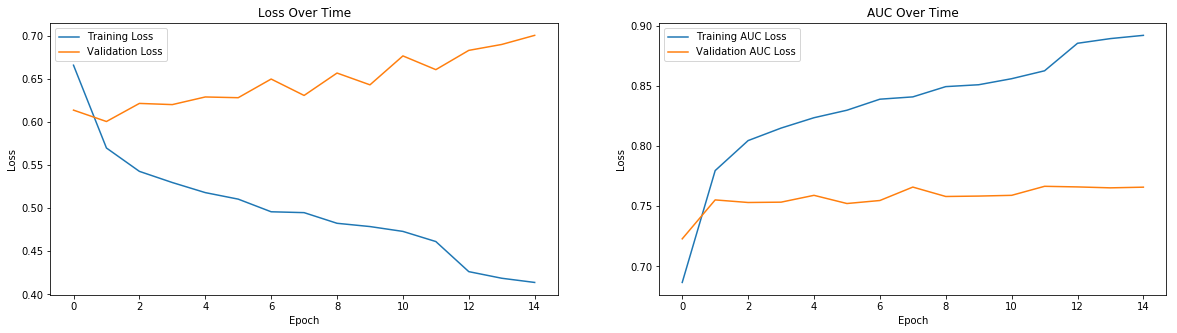

In [67]:
plt.figure(figsize=(20,5))

epoch_range = range(epochs)
train_loss, val_loss = history.history['loss'],history.history['val_loss']
train_auc, val_auc = history.history['AUC'],history.history['val_AUC']


plt.subplot(1,2,1)
plt.plot(epoch_range, train_loss, label='Training Loss')
plt.plot(epoch_range, val_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss Over Time')

plt.subplot(1,2,2)
plt.plot(epoch_range, train_auc, label='Training AUC Loss')
plt.plot(epoch_range, val_auc, label='Validation AUC Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('AUC Over Time')

In [59]:
#get the max epoch for rerun

np.argmax(val_auc)

14

## Results

In [68]:
results = model.evaluate(X_test, y_test, verbose=0)

print("Accuracy: ", results[1])
print("ROC AUC:", results[2])

Accuracy:  0.7919422
ROC AUC: 0.78894013


In [78]:
y_pred = pd.Series((np.squeeze(model.predict(X_test) > 0.5).astype(np.int)))

In [81]:
y_true = y_test.reset_index(drop=True)

In [85]:
positive_indices = y_true[y_true ==1].index

In [87]:
np.mean(y_true[positive_indices] == y_pred[positive_indices])

#to get the accuracy, so quite good

0.6774193548387096